# CSI Assignment 7: 
## Streamlit app on student  performance dataset to predict Math scores and Judge student overall performance


In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

# Load data
df = pd.read_csv("StudentsPerformance.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [15]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
df_numeric = df.copy()
categorical_cols = df_numeric.select_dtypes(include='object').columns

# One-hot encode categorical columns
df_numeric = pd.get_dummies(df_numeric, columns=categorical_cols, drop_first=True)


In [17]:
df_numeric.head()

,math_score,reading_score,writing_score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True



📊 Correlation Matrix (Rounded):

                                               math_score  reading_score  \
math_score                                           1.00           0.82   
reading_score                                        0.82           1.00   
writing_score                                        0.80           0.95   
gender_male                                          0.17          -0.24   
race/ethnicity_group B                              -0.08          -0.06   
race/ethnicity_group C                              -0.07          -0.00   
race/ethnicity_group D                               0.05           0.04   
race/ethnicity_group E                               0.21           0.11   
parental_level_of_education_bachelor's degree        0.08           0.10   
parental_level_of_education_high school             -0.13          -0.15   
parental_level_of_education_master's degree          0.06           0.11   
parental_level_of_education_some college             0

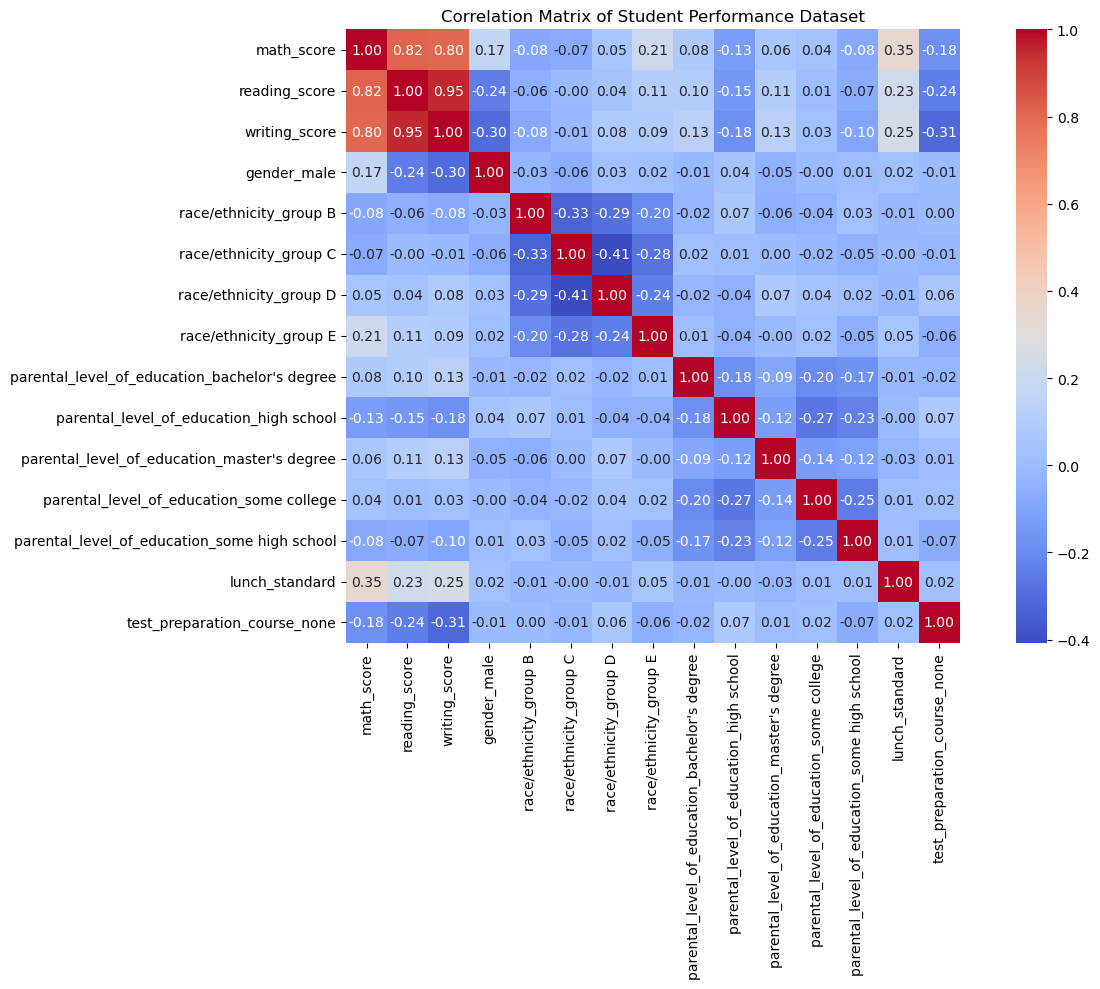

In [18]:
# Compute correlation matrix
corr_matrix = df_numeric.corr()
print("\n📊 Correlation Matrix (Rounded):\n")
print(corr_matrix.round(2))
# Plot
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Student Performance Dataset")
plt.tight_layout()
plt.show()


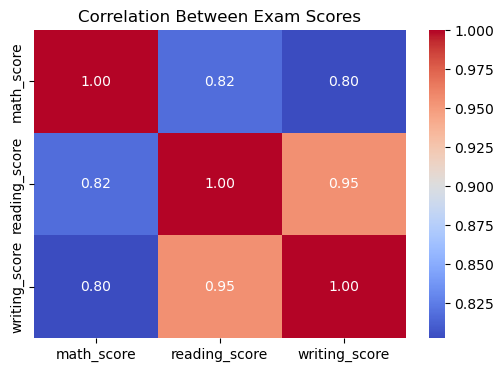

In [19]:
num_cols = ['math_score', 'reading_score', 'writing_score']
corr = df[num_cols].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Exam Scores")
plt.show()

In [ ]:

# One-hot encode 'lunch' (keep 'standard' only)
df['lunch_standard'] = (df['lunch'] == 'standard').astype(int)

# Select features and target
X = df[['reading_score', 'writing_score', 'lunch_standard']]
y = df['math_score']


In [37]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Predictions
y_pred = model_lr.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n✅ RMSE: {rmse:.2f}")
print(f"✅ R² Score: {r2: .2f}")



✅ RMSE: 8.56
✅ R² Score:  0.70


In [22]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

models = {
    "LinearRegression": (LinearRegression(), {}),
    
    "Ridge": (Ridge(), {
        "alpha": [0.01, 0.1, 1, 10]
    }),
    
    "DecisionTree": (DecisionTreeRegressor(random_state=42), {
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10]
    }),
    
    "RandomForest": (RandomForestRegressor(random_state=42), {
        "n_estimators": [50, 100],
        "max_depth": [5, 10, None]
    }),
    
    "SVR": (SVR(), {
        "kernel": ["linear", "rbf"],
        "C": [0.1, 1, 10]
    })
}


In [ ]:
results = []

for name, (model, params) in models.items():
    if params:
        grid = GridSearchCV(model, params, cv=5, scoring='r2')
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
    else:
        best_model = model.fit(X_train, y_train)
    
    y_pred = best_model.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Best Estimator": best_model,
        "RMSE": rmse,
        "R² Score": r2
    })


c:\Users\dhana\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\dhana\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\dhana\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\dhana\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

In [26]:
results_df = pd.DataFrame(results).sort_values("R² Score", ascending=False)
print(results_df[["Model", "RMSE", "R² Score"]])


              Model      RMSE  R² Score
3      RandomForest  8.505775  0.702685
1             Ridge  8.555904  0.699170
4               SVR  8.556617  0.699120
0  LinearRegression  8.556985  0.699094
2      DecisionTree  8.639934  0.693232


C:\Users\dhana\AppData\Local\Temp\ipykernel_24004\2694452547.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R² Score", y="Model", data=results_df, palette="viridis")


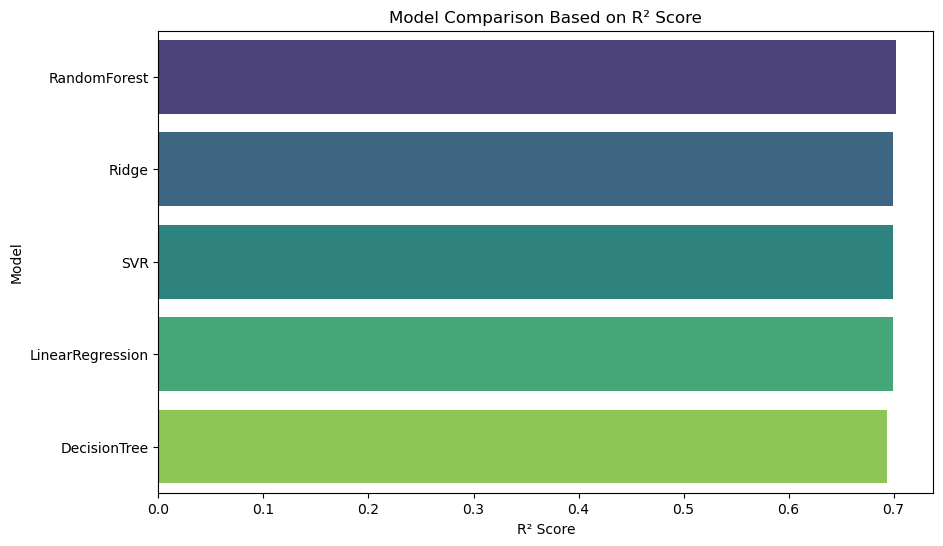

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x="R² Score", y="Model", data=results_df, palette="viridis")
plt.title("Model Comparison Based on R² Score")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.show()


In [44]:


rf = RandomForestRegressor(random_state=42)
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [5, 10, None]
}

# Grid Search
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='r2')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
# Predict
y_pred_rf = best_rf.predict(X_test)

# Evaluation
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"✅ Random Forest RMSE: {rmse_rf:.2f}")
print(f"✅ Random Forest R² Score: {r2_rf:.2f}")


✅ Random Forest RMSE: 8.51
✅ Random Forest R² Score: 0.70


In [45]:
import joblib
joblib.dump(best_rf, 'random_forest_best_model.pkl')
joblib.dump(model_lr, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

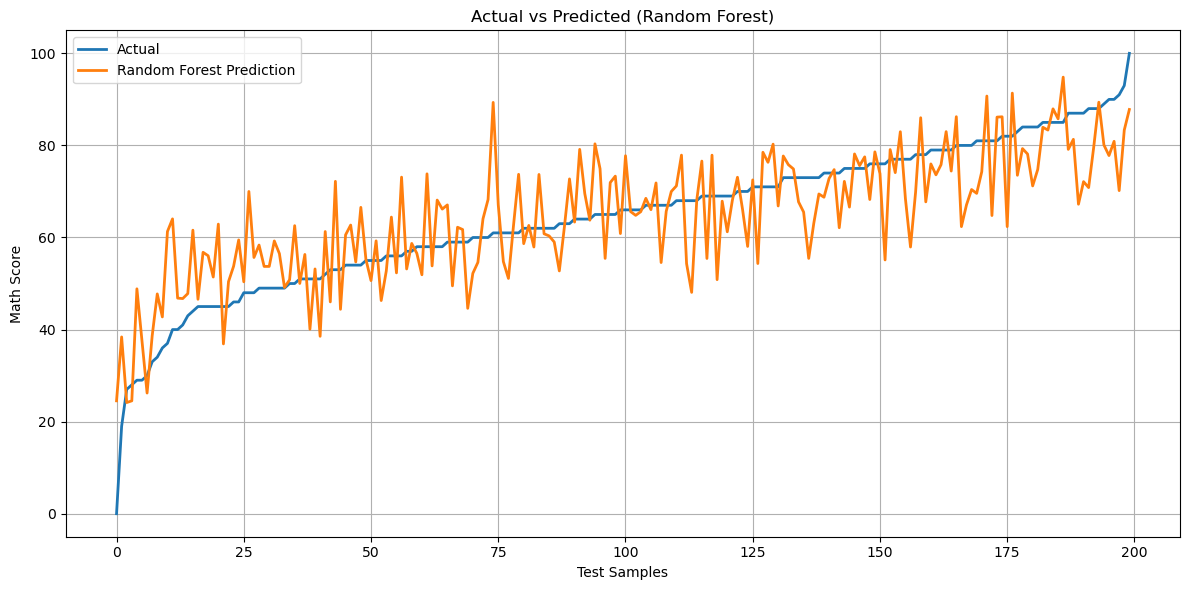

In [ ]:
# Sort actual and predicted values for better line plotting
sorted_index = np.argsort(y_test.values)

plt.figure(figsize=(12, 6))
plt.plot(np.array(y_test)[sorted_index], label="Actual", linewidth=2)
plt.plot(y_pred_rf[sorted_index], label="Random Forest Prediction", linewidth=2)
plt.title("Actual vs Predicted (Random Forest)")
plt.xlabel("Test Samples")
plt.ylabel("Math Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


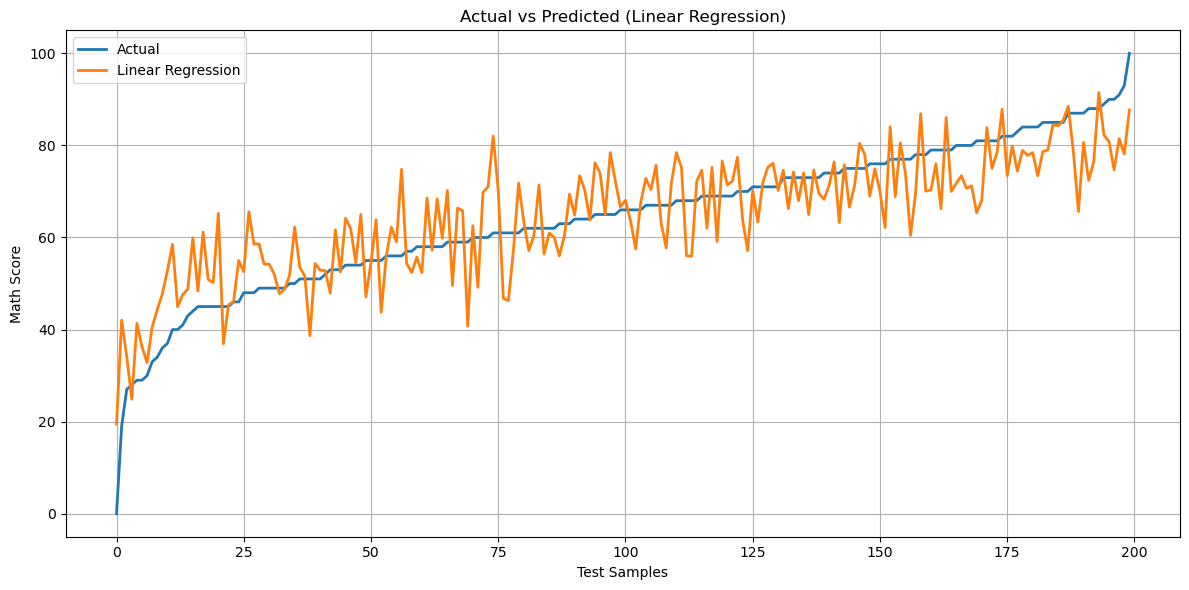

In [34]:
y_pred_lr = model_lr.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(np.array(y_test)[sorted_index], label="Actual", linewidth=2)
plt.plot(y_pred_lr[sorted_index], label="Linear Regression",  linewidth=2)
plt.title("Actual vs Predicted (Linear Regression)")
plt.xlabel("Test Samples")
plt.ylabel("Math Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
